In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading Datasets
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv('C:/Users/krisa/Desktop/c programming/summer internship note book/titanic-dataset/Titanic.csv')
test = pd.read_csv('C:/Users/krisa/Desktop/c programming/summer internship note book/titanic-dataset/Titanic.csv')
train.head()

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,...,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,...,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,...,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,...,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,...,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


In [532]:
#Display shape
train.shape

(1000, 11)

In [533]:
test.shape

(1000, 11)

In [534]:
#Checking for Null values
train.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [535]:

#Description of dataset
train.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Embarked,Survived
count,1000.000000,1000.000000,1000,1000,1000.000000,...,1000.000000,1000,1000.000000,1000,1000.000000
unique,NaN,NaN,995,2,NaN,...,NaN,1000,NaN,3,NaN
top,NaN,NaN,Michael Miller,male,NaN,...,NaN,43d75413-a939-4bd1-a516-b0d47d3572cc,NaN,Q,NaN
freq,NaN,NaN,2,527,NaN,...,NaN,1,NaN,362,NaN
mean,500.500000,1.964000,NaN,NaN,38.458000,...,2.005000,NaN,247.968650,NaN,0.492000
std,288.819436,0.820596,NaN,NaN,23.103723,...,1.410306,NaN,139.301211,NaN,0.500186
min,1.000000,1.000000,NaN,NaN,1.000000,...,0.000000,NaN,10.020000,NaN,0.000000
25%,250.750000,1.000000,NaN,NaN,19.000000,...,1.000000,NaN,126.295000,NaN,0.000000
50%,500.500000,2.000000,NaN,NaN,36.500000,...,2.000000,NaN,246.500000,NaN,0.000000
75%,750.250000,3.000000,NaN,NaN,59.000000,...,3.000000,NaN,365.662500,NaN,1.000000


In [536]:
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 527


In [537]:
female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 473


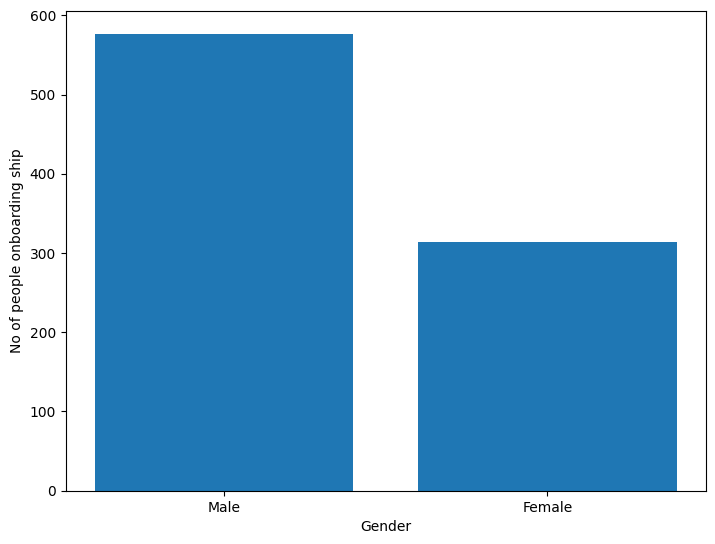

In [538]:
#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [539]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [540]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.484144
male,0.499051


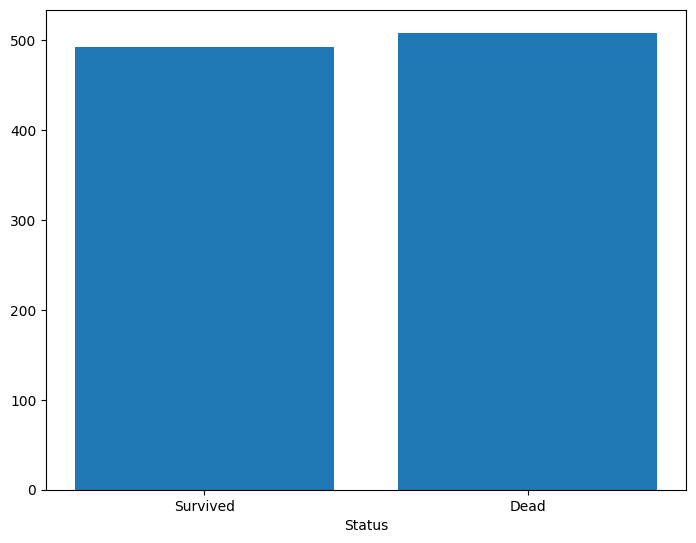

In [541]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind)
plt.xlabel("Status")
plt.show()

Text(0.5, 1.0, "Bar graph of people accrding to ticket class in which people couldn't survive")

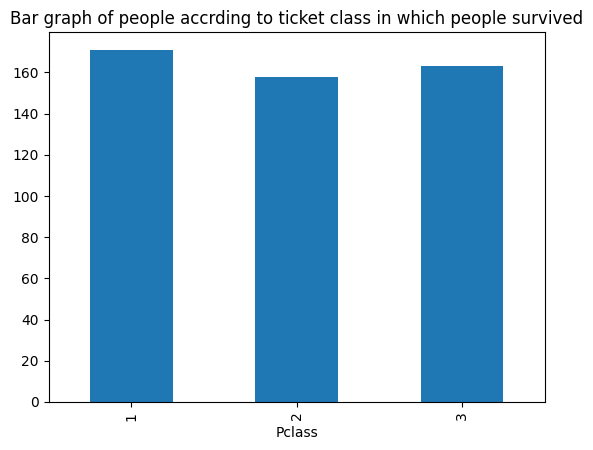

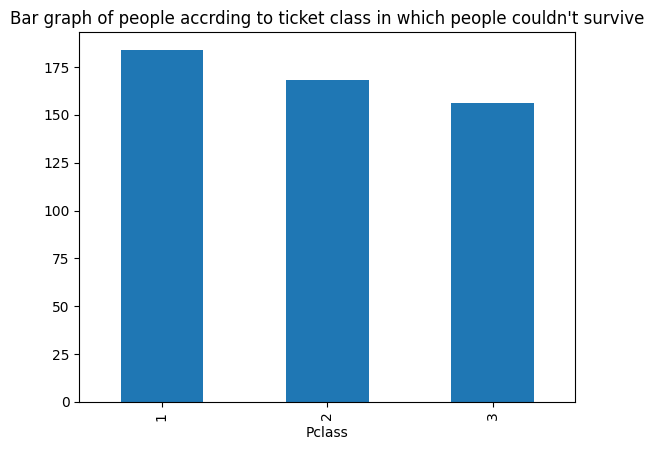

In [542]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people survived')


plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Bar graph of people accrding to ticket class in which people couldn\'t survive')

([<matplotlib.axis.XTick at 0x1a57ce36c00>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

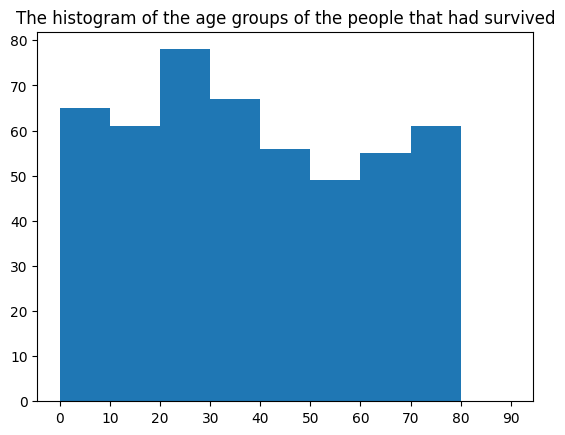

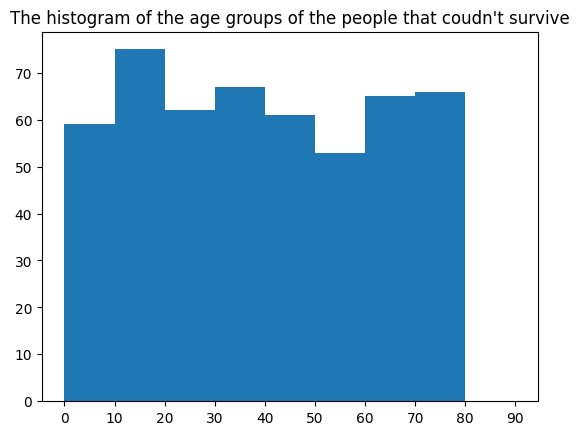

In [543]:
plt.figure(1)
age  = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))


plt.figure(2)
age  = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.hist(age, np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [544]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
2,2,0.524752
4,4,0.524752
1,1,0.476744
3,3,0.472222
0,0,0.461538


In [545]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
2,3,0.510972
1,2,0.484663
0,1,0.481690


In [546]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)


,Age,Survived
0,1,0.636364
1,2,0.368421
2,3,0.533333
3,4,0.357143
4,5,0.846154
...,...,...
74,75,0.352941
75,76,0.615385
76,77,0.666667
77,78,0.600000


In [547]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,Q,0.505525
2,S,0.493548
0,C,0.475610


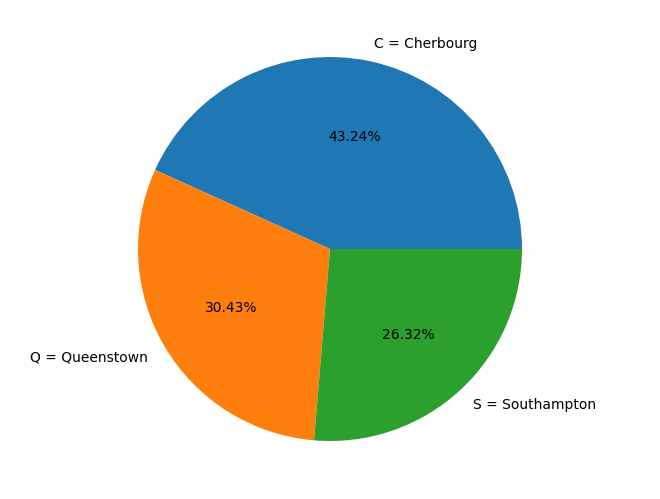

In [548]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [549]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Embarked,Survived
count,1000.000000,1000.000000,1000,1000,1000.000000,...,1000.000000,1000,1000.000000,1000,1000.000000
unique,NaN,NaN,995,2,NaN,...,NaN,1000,NaN,3,NaN
top,NaN,NaN,Michael Miller,male,NaN,...,NaN,43d75413-a939-4bd1-a516-b0d47d3572cc,NaN,Q,NaN
freq,NaN,NaN,2,527,NaN,...,NaN,1,NaN,362,NaN
mean,500.500000,1.964000,NaN,NaN,38.458000,...,2.005000,NaN,247.968650,NaN,0.492000
std,288.819436,0.820596,NaN,NaN,23.103723,...,1.410306,NaN,139.301211,NaN,0.500186
min,1.000000,1.000000,NaN,NaN,1.000000,...,0.000000,NaN,10.020000,NaN,0.000000
25%,250.750000,1.000000,NaN,NaN,19.000000,...,1.000000,NaN,126.295000,NaN,0.000000
50%,500.500000,2.000000,NaN,NaN,36.500000,...,2.000000,NaN,246.500000,NaN,0.000000
75%,750.250000,3.000000,NaN,NaN,59.000000,...,3.000000,NaN,365.662500,NaN,1.000000


In [550]:
#Droping Useless Columns
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [551]:
train = train.drop(['Embarked'], axis = 1)
test = test.drop(['Embarked'], axis = 1)

In [552]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)